In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=["Unnamed: 0", "Booking_ID"], inplace=True)

In [6]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(7661)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [11]:
df["no_of_adults"].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [12]:
cat_cols = [
  'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status'
]
num_cols = [
  'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests'
]

### DATA ANALYSIS

In [13]:
data = df.copy()
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


##### UNIVARIATE ANALYSIS(tek değişken)

In [14]:
def num_plot_dist(df, num_features):
  fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
  
  if len(num_features) == 1:
    axes = [axes]
  
  for i, column in enumerate(num_features):
    sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
    axes[i][0].set_title(f"Histogram for {column}")

    sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
    axes[i][1].set_title(f"Box plot for {column}")

  plt.tight_layout()
  plt.show()

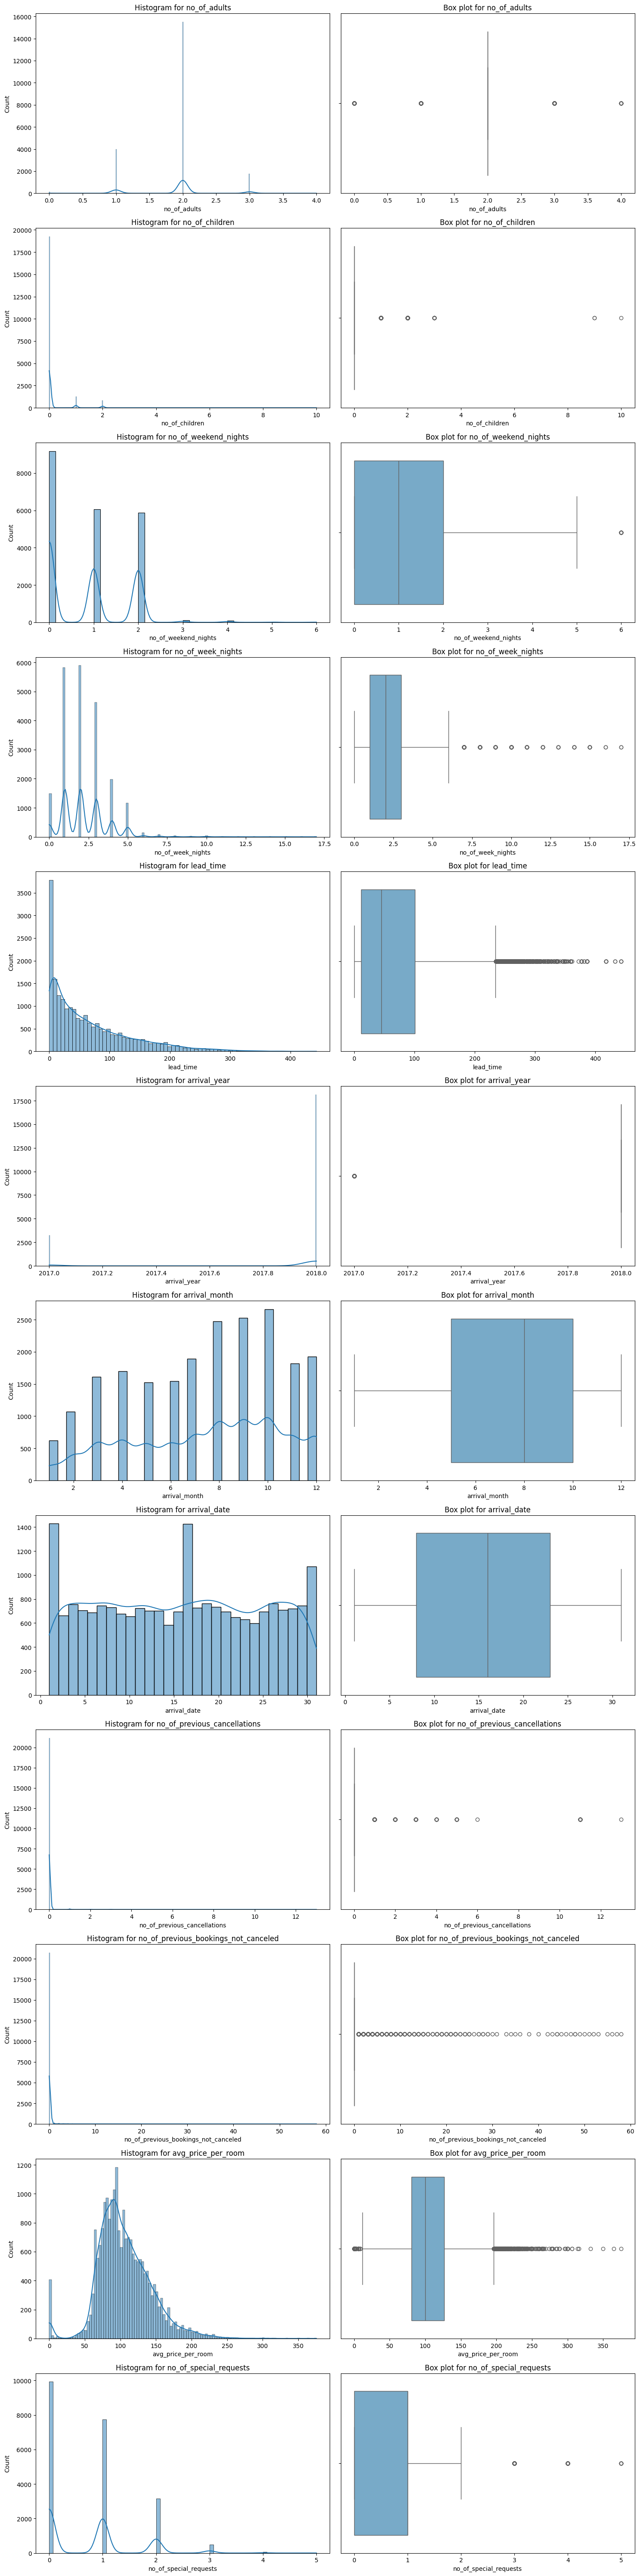

In [15]:
num_plot_dist(data, num_cols)

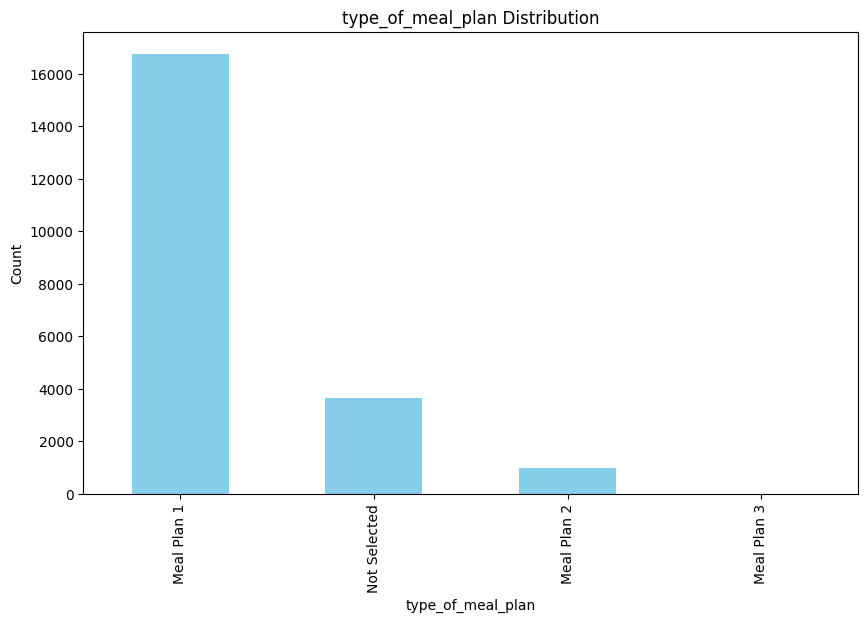

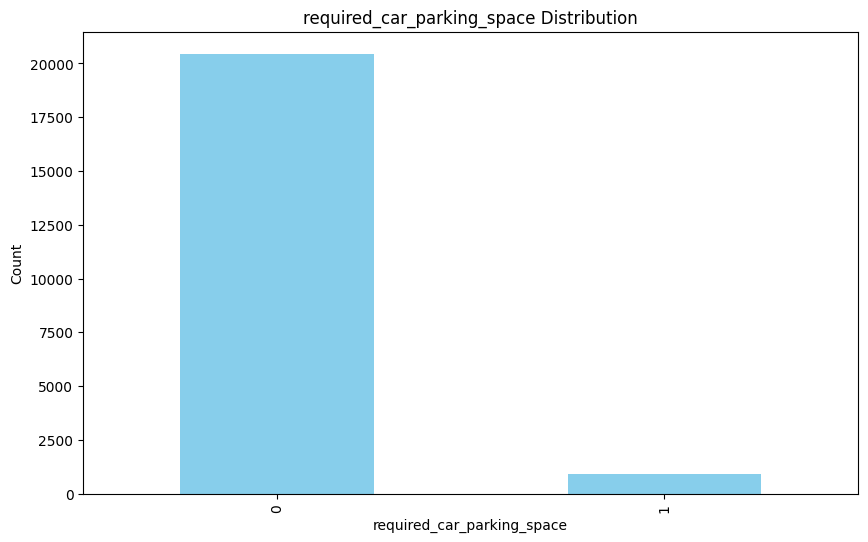

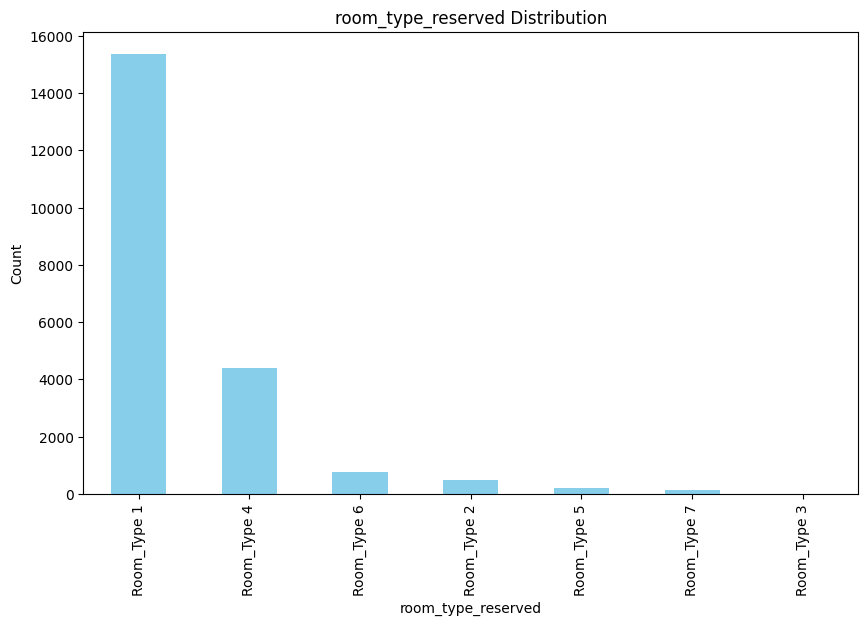

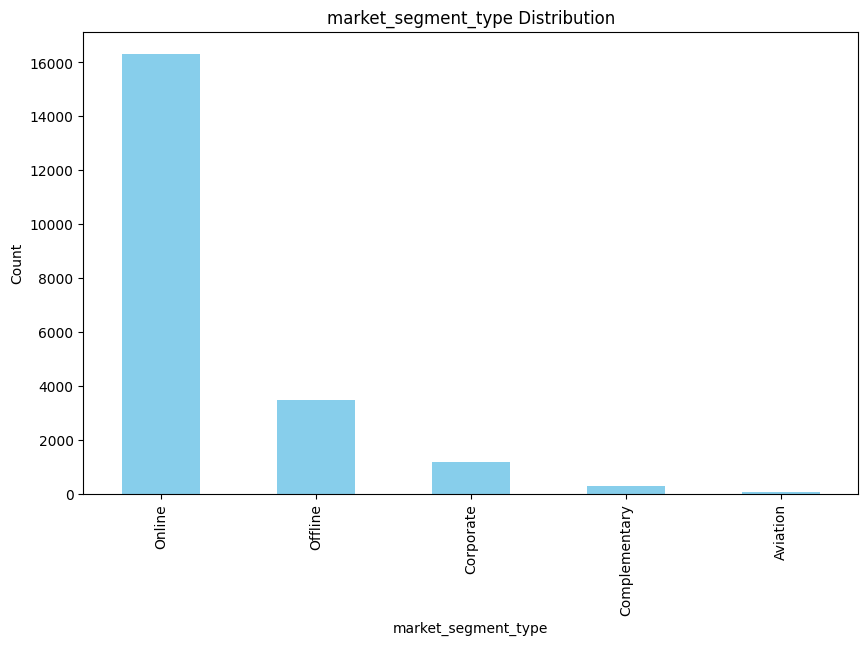

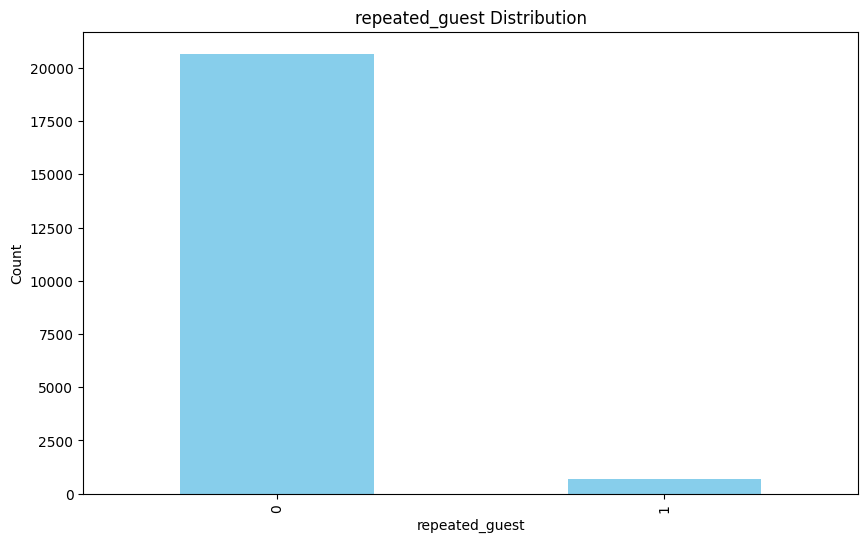

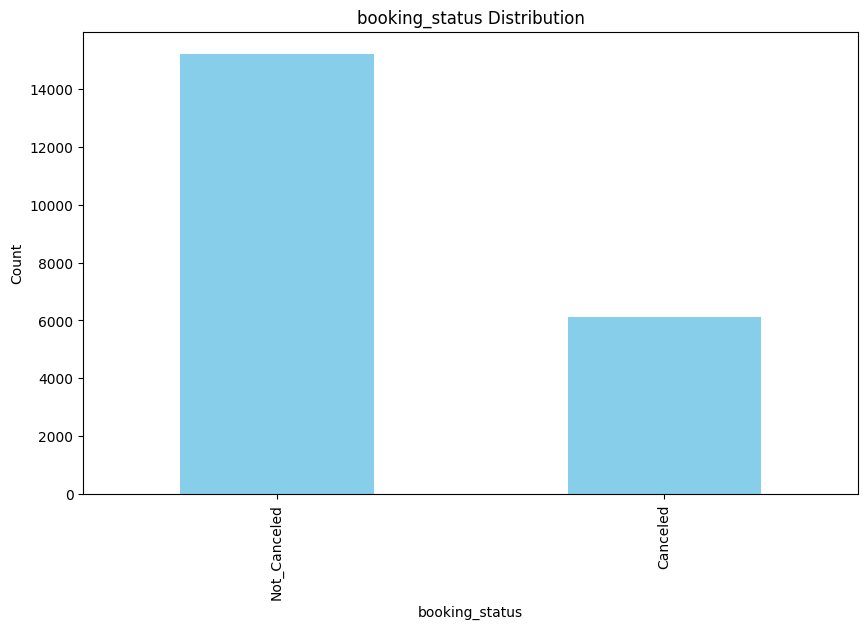

In [16]:
for cat_feature in cat_cols:
  plt.figure(figsize=(10, 6))
  data[cat_feature].value_counts().plot(kind="bar", color="skyblue")
  plt.title(f"{cat_feature} Distribution")
  plt.xlabel(cat_feature)
  plt.ylabel("Count")
  plt.show()

#### Bivariate Analysis

In [17]:
def plot_bivariate_num(df, target, num_features):
  num_plots = len(num_features)
  num_rows = (num_plots + 1) // 2

  fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
  axes = axes.flatten()

  for i, column in enumerate(num_features):
    sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
    axes[i].set_title(f"{column} VS {target}")

  plt.tight_layout()
  plt.show()

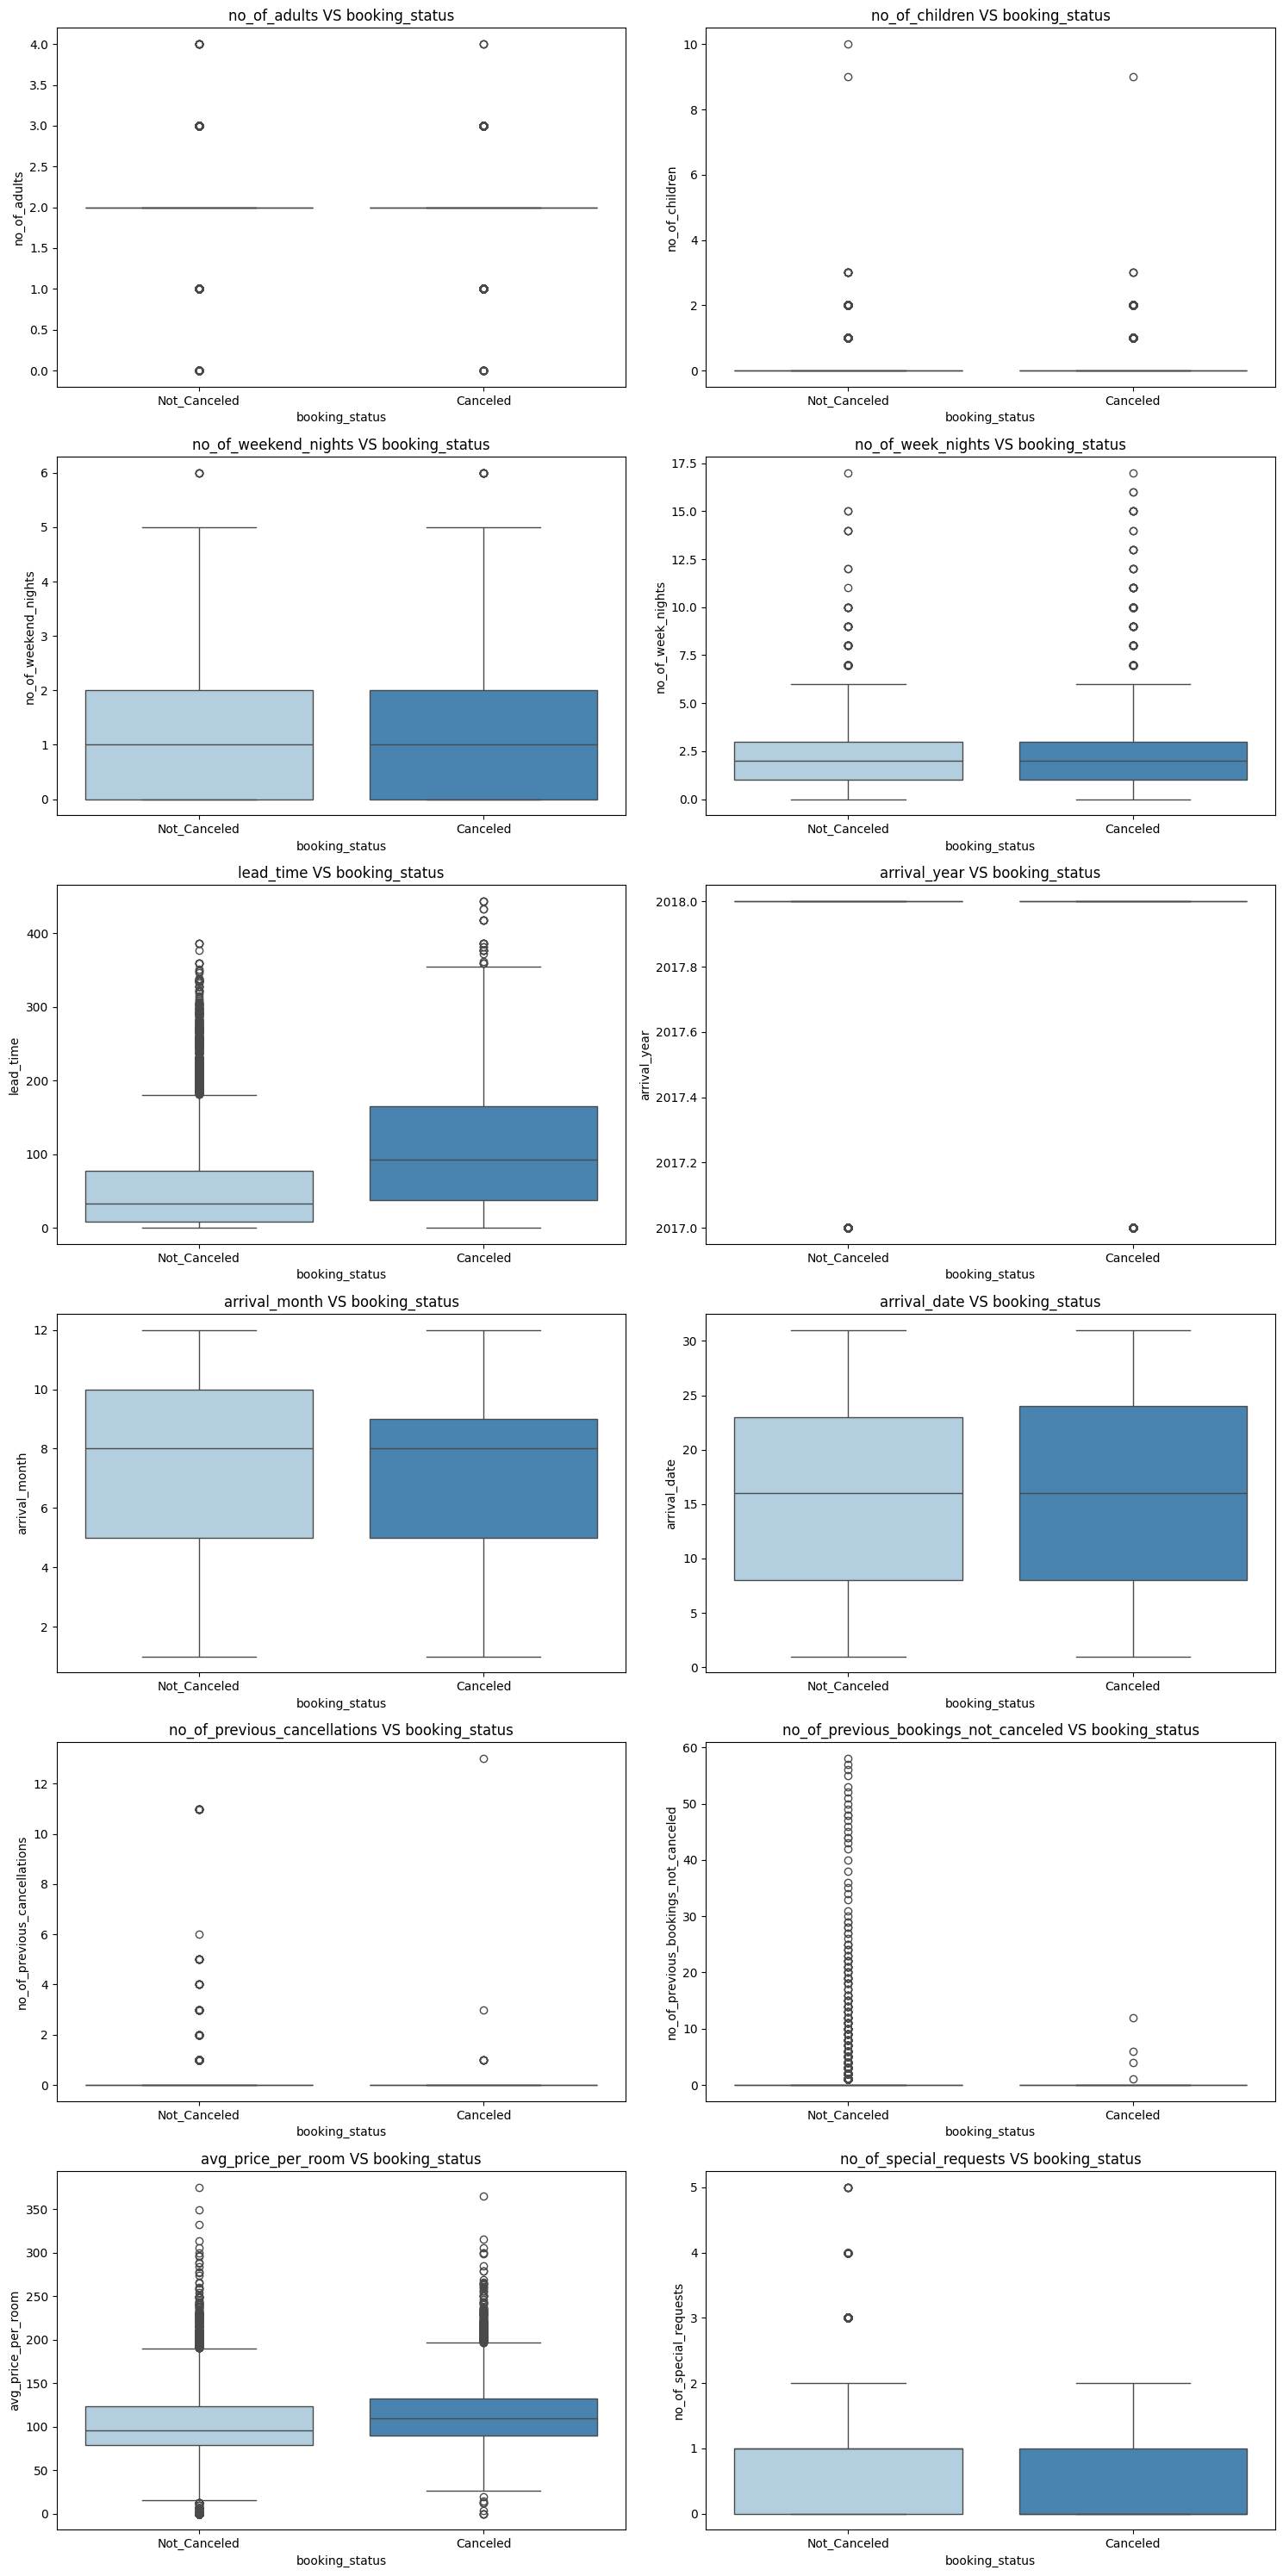

In [18]:
plot_bivariate_num(data, "booking_status", num_cols)

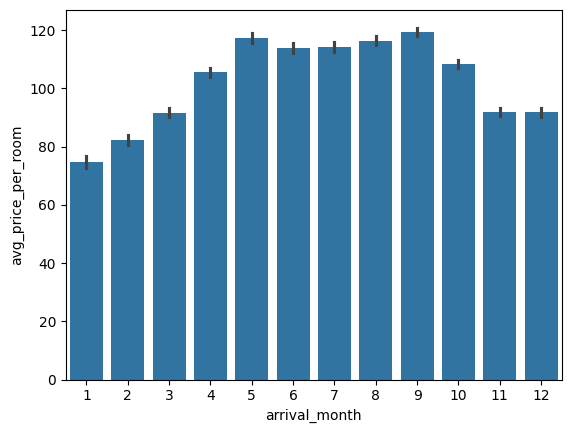

In [19]:
sns.barplot(x="arrival_month", y="avg_price_per_room", data=data)
plt.show()

In [20]:
def plot_bivariate_cat(df, target, cat_features):
  num_features = len(cat_features)
  num_rows = (num_features + 1) // 2

  fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
  axes = axes.flatten()

  for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{feature} VS {target}")
    axes[i].tick_params(axis="x", rotation=90)

  plt.tight_layout()
  plt.show()

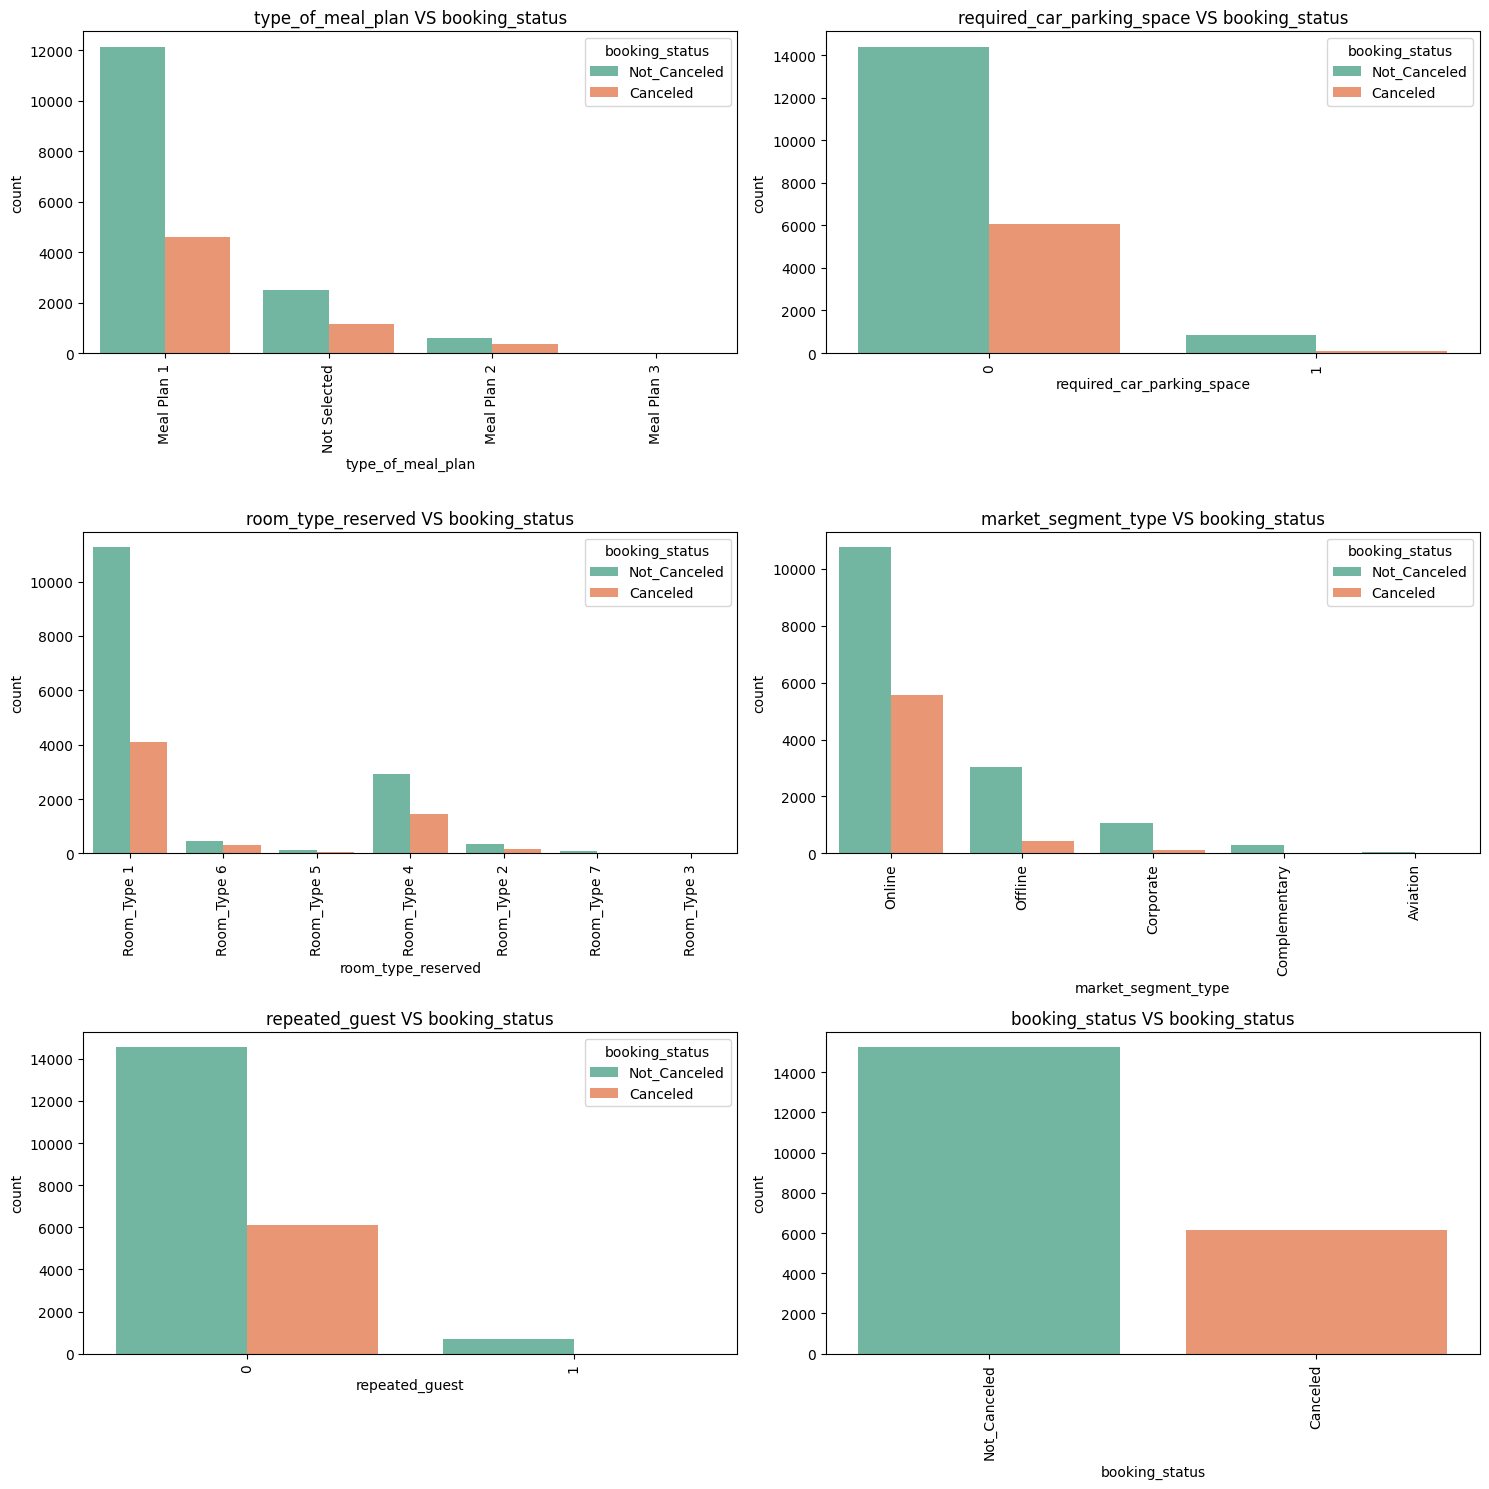

In [21]:
plot_bivariate_cat(data, "booking_status", cat_cols)

### DATA PROCESSING

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

#### Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
  df[col] = label_encoder.fit_transform(df[col])

  mappings[col] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [25]:
mappings


{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [26]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


### Multicollinearity

In [27]:
!pip install statsmodels

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [29]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [30]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [31]:
### Bizim veride multicollinearity(birbirine benzeyen veriler vs.) yok çünkü tüm sayılar 5 veya 6dan küçük ###

In [32]:
corr = df.corr()

In [33]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

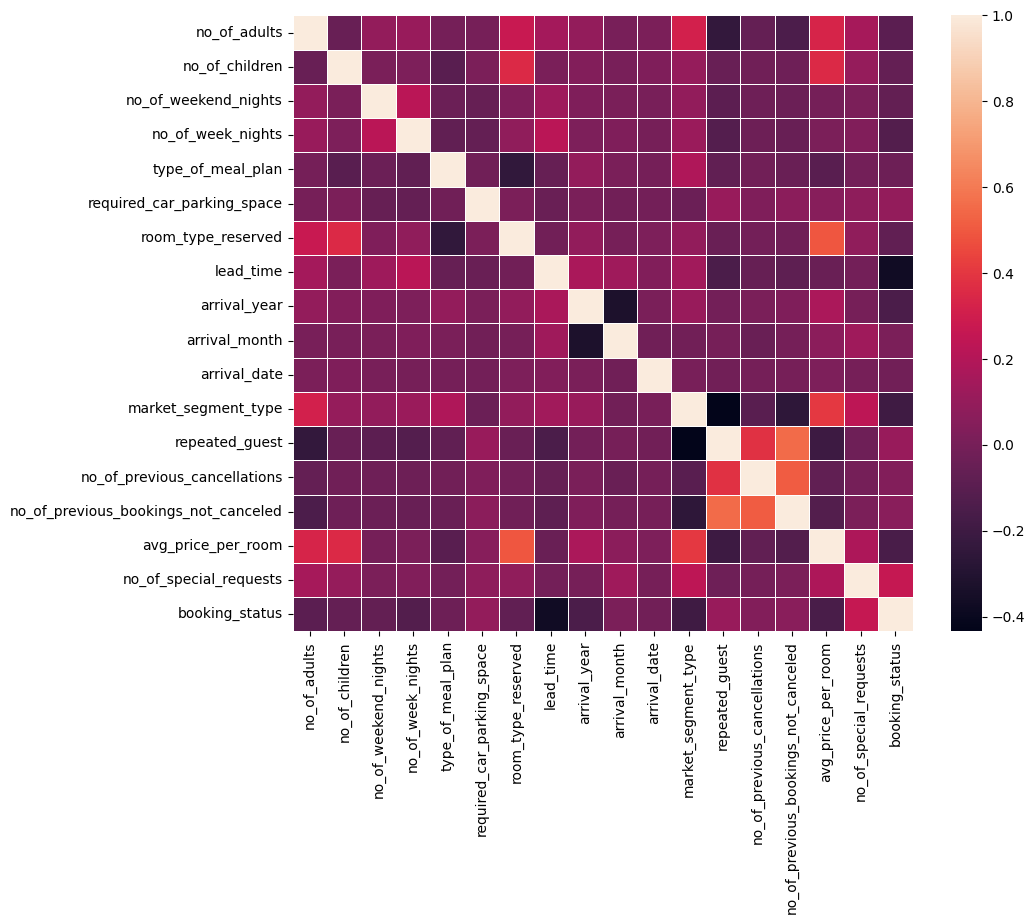

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, linewidths=0.5)

#### Skewness

In [35]:
skewness = df.skew()

In [36]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [37]:
for col in df.columns:
  if skewness[col] > 5:
    df[col] = np.log1p(df[col])

### Imbalanced Data

In [38]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [39]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [40]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [41]:
!pip install imbalanced-learn

In [42]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [45]:
y_res

0        1
1        1
2        0
3        1
4        0
        ..
30457    0
30458    0
30459    0
30460    0
30461    0
Name: booking_status, Length: 30462, dtype: int64

In [46]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [47]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [48]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [49]:
balanced_df.shape

(30462, 18)

In [50]:
df = balanced_df.copy()

#### Feature Selection

In [51]:
len(df.columns)

18

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [54]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
feature_importance = model.feature_importances_

In [56]:
feature_importance_df = pd.DataFrame({
  "feature": X.columns,
  "importance": feature_importance
})

In [57]:
top_features_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)

In [58]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

top_10_df

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.000000,10,17,4,1,2,0,0,1
1,98,2,121.500000,7,16,4,1,1,0,0,1
2,433,0,70.000000,9,8,3,3,0,0,0,0
3,195,0,72.250000,8,8,3,5,2,0,0,1
4,188,0,130.000000,6,15,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30457,265,0,111.037207,6,24,3,2,0,1,0,0
30458,103,0,72.250000,4,18,3,3,1,0,0,0
30459,27,0,104.556265,6,12,4,2,1,1,0,0
30460,46,0,107.100000,4,4,4,1,1,3,0,0


In [59]:
df = top_10_df.copy()

#### MODEL SELECTION

In [60]:
!pip install xgboost lightgbm

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [62]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
classifiers = {
  "RandomForest": RandomForestClassifier(random_state=42),
  "LogisticRegression": LogisticRegression(random_state=42),
  "GradiendBoosting": GradientBoostingClassifier(random_state=42),
  "SupportVectorClassifier": SVC(random_state=42),
  "DecisionTree": DecisionTreeClassifier(random_state=42),
  "KNN": KNeighborsClassifier(),
  "NaiveBayes": GaussianNB(),
  "XGboost": XGBClassifier(random_state=42),
  "Adaboost": AdaBoostClassifier(random_state=42),
  "LGBM": LGBMClassifier(random_state=42)
}

In [65]:
metrics = {
  "Model": [],
  "Accuracy": [],
  "Precision": [],
  "Recall": [],
  "F1 Score": []
}

In [66]:
for model_name, classifier in classifiers.items():
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)
  
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  metrics["Model"].append(model_name)
  metrics["Accuracy"].append(accuracy)
  metrics["Precision"].append(precision)
  metrics["Recall"].append(recall)
  metrics["F1 Score"].append(f1)

In [67]:
metrics_df = pd.DataFrame(metrics)

metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForest,0.891351,0.893721,0.890228,0.891971
1,LogisticRegression,0.786640,0.804752,0.761238,0.782390
2,GradiendBoosting,0.838175,0.819632,0.870358,0.844234
3,SupportVectorClassifier,0.720335,0.729657,0.706840,0.718068
4,DecisionTree,0.836534,0.845667,0.826384,0.835914
5,KNN,0.779255,0.856258,0.675244,0.755054
6,NaiveBayes,0.773182,0.803161,0.728339,0.763922
7,XGboost,0.874610,0.870978,0.881759,0.876335
8,Adaboost,0.804530,0.801025,0.814332,0.807624
9,LGBM,0.866076,0.851309,0.889577,0.870022


#### TRAIN OUR RF MODEL

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [69]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
rf = RandomForestClassifier(random_state=42)

In [73]:
params_distribution = {
  "n_estimators": randint(100, 500),
  "max_depth": randint(10, 50),
  "min_samples_split": randint(2, 10),
  "min_samples_leaf": randint(1, 5),
  "bootstrap": [True, False]
}

In [74]:
random_search = RandomizedSearchCV(
  estimator=rf,
  param_distributions=params_distribution,
  n_iter=5,
  cv=5,
  verbose=2,
  random_state=42,
  scoring="accuracy"
)

In [75]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.2s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....00180186FF610>, 'min_samples_leaf': <scipy.stats....001801873E610>, 'min_samples_split': <scipy.stats....00180186FF6D0>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [76]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [77]:
best_rf_model = random_search.best_estimator_

In [78]:
y_pred = best_rf_model.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [80]:
accuracy

0.8916789758739537

In [81]:
precision

0.8877091377091377

In [82]:
recall

0.8986970684039088

In [83]:
f1

0.8931693104564584

#### Save this model

In [84]:
import joblib

In [85]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [86]:
loaded_model = joblib.load("random_forest.pkl")

In [87]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [89]:
new_data = np.array([190, 1, 93.5, 9, 8, 4,	5, 2,	0, 0]).reshape(1, -1)

In [90]:
predictions = loaded_model.predict(new_data)

In [91]:
predictions

array([1])